## Lending Club Case Study

In [1]:
# importing all Needed Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Data from dataframe
loan_df = pd.read_csv("loan.csv"
                   ,encoding = "ISO-8859-1", 
                   low_memory=False
                  )
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_length = len(loan_df)
loan_length

39717

In [4]:
# Description of data
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
# information about the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# size of dataframe
loan_df.shape

(39717, 111)

In [7]:
#list of all columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data Cleaning
#### 1. Treating Missing Values

In [8]:
#Missing percentage of every columns
round(100
      * (loan_df.isnull().sum()
         / len(loan_df.id)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [9]:
# Find the length columns whose missing value is more than 50%
missing_values = round(100
                       * (loan_df.isnull().sum()
                          / len(loan_df.id)), 2)
missing_columns = list(missing_values[missing_values>50].index)

In [10]:
# Drop above columns 
loan_df = loan_df.drop(missing_columns,axis=1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
loan_df.shape

(39717, 54)

In [12]:
missing_values = round(100
                       * (loan_df.isnull().sum()
                          / len(loan_df.id)), 2)
missing_values[missing_values != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [13]:
loan_df['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

#### 'desc' doesn't contribute in the analysis as it is description of loan so remove this column is better 

In [14]:
# dropping of 'desc' column
loan_df = loan_df.drop('desc'
                       ,axis=1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
missing_values = round(100
                       *(loan_df.isnull().sum()
                         / len(loan_df.id)), 2)
missing_values[missing_values != 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [16]:
# null or missing value of column in rows
loan_df.isnull().sum(axis=1).value_counts()

0    36431
1     2168
2     1054
4       34
3       23
5        7
dtype: int64

Out of above data we will decide how to manage the missing values on the basis of either is categorical or non-categorical 

In [17]:
# for column lengths of uniques
print(len(loan_df.emp_title.unique()))
print(len(loan_df.emp_length.unique()))
print(len(loan_df.title.unique()))
print(len(loan_df.revol_util.unique()))
print(len(loan_df.last_pymnt_d.unique()))
print(len(loan_df.last_credit_pull_d.unique()))
print(len(loan_df.collections_12_mths_ex_med.unique()))
print(len(loan_df.chargeoff_within_12_mths.unique()))
print(len(loan_df.pub_rec_bankruptcies.unique()))
print(len(loan_df.tax_liens.unique()))

28821
12
19616
1090
102
107
2
2
4
2


In [18]:
# out of these it is very clear out of above 5 seems to be categorical let's see these columns
print("data of emp_length ==>"
      ,loan_df.emp_length.unique())
print("data of collections_12_mths_ex_med ==>"
      ,loan_df.collections_12_mths_ex_med.unique())
print("data of chargeoff_within_12_mths ==>"
      ,loan_df.chargeoff_within_12_mths.unique())
print("data of pub_rec_bankruptcies ==>"
      ,loan_df.pub_rec_bankruptcies.unique())
print("data of tax_liens ==>"
      ,loan_df.tax_liens.unique())

data of emp_length ==> ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
data of collections_12_mths_ex_med ==> [ 0. nan]
data of chargeoff_within_12_mths ==> [ 0. nan]
data of pub_rec_bankruptcies ==> [ 0.  1.  2. nan]
data of tax_liens ==> [ 0. nan]


The Columns collection like collections_12_mths_ex_med,pub_rec_bankruptcies,tax_liens does't contribute in analysis as it contains only 0 or NAN. So dropping is better for such columns

In [19]:
loan_df = loan_df.drop(['collections_12_mths_ex_med'
                        , 'chargeoff_within_12_mths'
                        , 'tax_liens']
                       ,axis=1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


In [20]:
# the shape becomes after removing non contributing columns
loan_df.shape

(39717, 50)

In [21]:
# pub_rec_bankruptcies contains 1.76% missing values let's observe the values
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

As the pub_rec_bankruptcies plays an important role in analysis and imputing the 0 ,1 or 2 is not correct so we delete such data 

In [22]:
# removing pub_rec_bankruptcies nan values
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [23]:
# the shape becomes after removing non contributing columns
loan_df.shape

(39020, 50)

In [24]:
# percentage of missing values in columns
missing_columns = round(100
                *(loan_df.isnull().sum()
                  /len(loan_df)), 2) 
missing_columns[missing_columns != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

The Columns like emp_title,emp_length have 6.19 and 2.75 percent of missing values as they contribute in analysis so we remove NAN values

In [25]:
# data after removing NAN from these columns
loan_df=loan_df[~loan_df.emp_title.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0


In [26]:
# the shape becomes after removing non contributing columns
loan_df.shape

(36548, 50)

In [27]:
# percentage of missing values in columns
missing_columns = round(100
                *(loan_df.isnull().sum()
                  /len(loan_df)), 2) 
missing_columns[missing_columns != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

title - The loan title provided by the borrower
revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
last_pymnt_d - Last month payment was received

#### these above columns can directly contributed in analysis so removing the null values of these columns

In [28]:
loan_df=loan_df[~loan_df.title.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0


In [29]:
# the shape of dataframe after operations
loan_df.shape

(36433, 50)

In [30]:
# percentage of missing values in columns
missing_columns = round(100
                *(loan_df.isnull().sum()
                  /len(loan_df)), 2) 
missing_columns[missing_columns != 0]

Series([], dtype: float64)

In [31]:
# uniques of every column in dataframe
loan_df.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

There are few columns whose not directly or indirectly contributing in the analysis. Such columns are not drieve to the loan default. Some of those are redundant. These columns are

1. __id__ : it is a random number given to loan, doesn't contribute in analysis
2. __member_id__ : it is a random unique number given to member, doesn't contribute in analysis
3. __url__ : url values doesn't contribute in analysis of loan default
4. __funded_amnt_inv__ : Value of this column is almost equivalent to loan_amnt. So remove multi colinearity
5. __funded_amnt__ : Value of this column is almost equivalent to loan_amnt. So remove multi colinearity
6. __zip_code__ : this is the customer related data that doesn't contribute in loan default analysis
7. __acc_now_delinq__ : Value for entire dataset is '0'. So remove this column
8. __application_type__: Value for entire dataset is 'INDIVIDUAL'. So remove this column
9. __policy_code__ : Value for entire dataset is '1'. So remove this column
10. __initial_list_status__ : Value for entire dataset is 'f'. So remove this column
11. __delinq_amnt__ : Value for entire dataset is '0'. So remove this column
12. __pymnt_plan__ : Value for entire dataset is 'n'. So remove this column

Dropping these non-contributing columns are next step.

In [32]:
loan_df= loan_df.drop(['id',
                       'member_id',
                       'funded_amnt',
                       'funded_amnt_inv',
                       'pymnt_plan','url',
                       'zip_code',
                       'initial_list_status',
                       'policy_code',
                       'application_type',
                       'acc_now_delinq',
                       'delinq_amnt',],axis=1)
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [33]:
# the shape of dataframe after operations
loan_df.shape

(36433, 38)

There are few columns i.e. related to date so we convert it into standard datetime format. These columns are :-
1. __issue_d__
2. __earliest_cr_line__
3. __last_pymnt_d__
4. __last_credit_pull_d__

In [34]:
# Check the type of above columns 
loan_df[['issue_d'
         ,'earliest_cr_line'
         ,'last_pymnt_d'
         ,'last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [35]:
# convert it into date time 
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df.last_pymnt_d = pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y')
loan_df.last_credit_pull_d = pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y')

In [36]:
# Check the type of above columns after datetime conversion
loan_df[['issue_d'
         ,'earliest_cr_line'
         ,'last_pymnt_d'
         ,'last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


There are some columns in the dataframe that contains % sign so remove that sign. these columns are :-
1. __int_rate__
2. __revol_util__

In [37]:
# describe the int_rate of dataframe
loan_df.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [38]:
# describe the revol_util of dataframe
loan_df.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [39]:
# Removing the % sign from data and convert it into float 
def remove_percent(x):
    return x.split('%')[0]
loan_df['int_rate'] = loan_df['int_rate'].apply(remove_percent).astype('float')
loan_df['revol_util'] = loan_df['revol_util'].apply(remove_percent).astype('float')

In [40]:
# data after operation of removing %
loan_df.int_rate.describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

In [41]:
# data after operation of removing %
loan_df.revol_util.describe()

count    36433.000000
mean        49.276251
std         28.191811
min          0.000000
25%         26.100000
50%         49.900000
75%         72.700000
max         99.900000
Name: revol_util, dtype: float64

There are some values that will contains a big float values. for those value we need to standardise the data upto 2 decimal place. these columns are :-
1. __total_pymnt__
2. __total_rec_late_fee__
3. __collection_recovery_fee__ 

In [42]:
# Round the values to 2 digits 
def round_value(x):
    return round(x,2)
loan_df.total_pymnt = loan_df.total_pymnt.apply(round_value)
loan_df.total_rec_late_fee= loan_df.total_pymnt.apply(round_value)
loan_df.collection_recovery_fee= loan_df.total_pymnt.apply(round_value) 

In [43]:
# data after round the values upto 2 decimal place 
loan_df.total_pymnt.head()

1     1008.71
3    12231.89
4     3513.33
5     5632.21
6    10110.84
Name: total_pymnt, dtype: float64

In [44]:
# data after round the values upto 2 decimal place 
loan_df.total_rec_late_fee.head()

1     1008.71
3    12231.89
4     3513.33
5     5632.21
6    10110.84
Name: total_rec_late_fee, dtype: float64

In [45]:
# data after round the values upto 2 decimal place 
loan_df.collection_recovery_fee.head()

1     1008.71
3    12231.89
4     3513.33
5     5632.21
6    10110.84
Name: collection_recovery_fee, dtype: float64

Now let's see the column __emp_length__ column.

In [46]:
loan_df.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

According to the above data we can convert the emp_length into the numerical data. So to convert the emp_length we can give the possible value to 0 to 10.

In [47]:
# dictonary for the values to be replaced with which numeric value
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
# Replace a numerical value for the  emp_length 
loan_df = loan_df.replace({'emp_length':emp_length_dict})
loan_df.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

Now earliest_cr_line is in the datetime format of pandas we can split it into month and year columns

In [48]:
# earliest_cr_line_month and earliest_cr_line_year new columns
loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year


In [49]:
# shape of a data_frame
loan_df.shape

(36433, 40)

In [50]:
# find the uniques of the year columns
loan_df.earliest_cr_line_year.unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1987, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2068, 1974, 2067, 2065, 2063,
       2066, 2062, 2056, 2046, 2050, 2064, 2054], dtype=int64)

There are some values i.e. greater than the current year which is impossible so we need to get correct year by difference by 100 in earliest_cr_line_year column

In [51]:
# make the year in correct format
loan_df.loc[loan_df['earliest_cr_line_year'] 
            > 2020 , 
            'earliest_cr_line_year'] = loan_df['earliest_cr_line_year'] - 100

In [52]:

loan_df.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

Same __issue_d__ is in datetime format let convert it into month and year

In [53]:
# value counts for loan_df
loan_df['issue_d'].value_counts()

2011-12-01    2126
2011-11-01    2048
2011-10-01    1951
2011-09-01    1925
2011-08-01    1810
2011-07-01    1732
2011-06-01    1702
2011-05-01    1575
2011-04-01    1463
2011-03-01    1339
2011-01-01    1299
2011-02-01    1186
2010-12-01    1174
2010-11-01    1064
2010-07-01    1062
2010-10-01    1046
2010-09-01    1030
2010-08-01    1030
2010-06-01     965
2010-05-01     870
2010-04-01     786
2010-03-01     678
2010-02-01     575
2009-11-01     534
2010-01-01     515
2009-12-01     513
2009-10-01     506
2009-09-01     437
2009-08-01     398
2009-07-01     361
2009-06-01     341
2009-05-01     307
2009-04-01     278
2009-03-01     267
2009-02-01     253
2009-01-01     228
2008-12-01     214
2008-11-01     175
2008-04-01     145
2008-03-01     112
2008-10-01      93
2008-07-01      77
2008-05-01      69
2008-08-01      66
2008-06-01      61
2008-09-01      29
2008-02-01       6
2008-01-01       6
2007-08-01       2
2007-12-01       2
2007-11-01       1
2007-10-01       1
Name: issue_

In [54]:
# let's split it into month and year 
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year

Now we will done with the data cleaning part let's move to the analysis part before data let's analyse the basic dataframe.

In [55]:
# copy the data from one variable to another
master_loan = loan_df[:]

In [56]:
# % of data we lost in data cleaning 
round(((loan_length 
        - len(loan_df))
       / loan_length)*100,2)

8.27

In [57]:
master_loan.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
count,36433.000000,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,36433.000000,36433.000000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,12.073862,326.186394,5.015645,6.930522e+04,13.444131,0.146131,0.86493,9.351604,0.053715,...,2304.404937,12310.968665,92.855490,12310.968665,2742.955476,0.041418,6.897318,1996.773365,7.210606,2010.373535
std,7433.859357,3.734758,207.389943,3.542914,6.354244e+04,6.643308,0.492199,1.06343,4.373772,0.234995,...,2629.542911,9048.420883,682.047187,9048.420883,4473.528922,0.200221,3.542471,6.574657,3.357084,0.807599
min,500.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.00000,2.000000,0.000000,...,6.220000,33.730000,0.000000,33.730000,0.010000,0.000000,1.000000,1946.000000,1.000000,2007.000000
25%,5600.000000,9.320000,168.900000,2.000000,4.200000e+04,8.360000,0.000000,0.00000,6.000000,0.000000,...,678.010000,5672.560000,0.000000,5672.560000,226.280000,0.000000,4.000000,1994.000000,4.000000,2010.000000
50%,10000.000000,11.860000,283.280000,4.000000,6.000000e+04,13.540000,0.000000,1.00000,9.000000,0.000000,...,1379.820000,10101.590000,0.000000,10101.590000,571.700000,0.000000,7.000000,1998.000000,7.000000,2011.000000
75%,15000.000000,14.650000,432.220000,9.000000,8.300000e+04,18.690000,0.000000,1.00000,12.000000,0.000000,...,2891.860000,16700.720000,0.000000,16700.720000,3457.580000,0.000000,10.000000,2001.000000,10.000000,2011.000000
max,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.00000,44.000000,4.000000,...,23563.680000,58563.680000,29623.350000,58563.680000,36115.200000,2.000000,12.000000,2008.000000,12.000000,2011.000000


In [58]:
# information of each column
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  object        
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  int64         
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

---
## Univariate Analysis
---

In [59]:
# Check the counts of loan status
master_loan['loan_status'] = master_loan['loan_status'].astype('category')
master_loan['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

The Loan Status Current doesn't contribute in the Analysis so we drop such data for the further analysis

In [60]:
# dropping of loan_status current from data set 
loan_analysis = master_loan[(master_loan['loan_status'] == 'Fully Paid') | (master_loan['loan_status'] == 'Charged Off')]
loan_analysis.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1008.71,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,12231.89,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,5632.21,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,10110.84,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011
7,3000,36 months,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,0.00,3939.14,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011


In [61]:
# now the value counts become for Further analysis 
loan_analysis['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current            0
Name: loan_status, dtype: int64

In [62]:
# default Rate of the loan in % is 
round(len(loan_analysis[loan_analysis['loan_status'] 
                        == 'Charged Off'])
      / len(loan_analysis['loan_status'])*100,2)

13.98

The overall default rate is about 13.98%.

For Univariate analysis the key column is __loan_status__ 

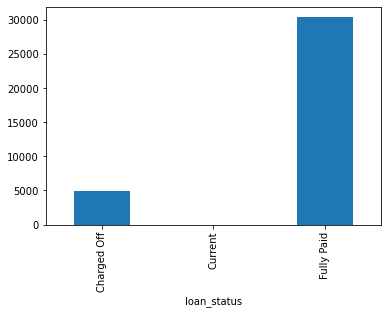

In [63]:
# bar chart for loan status
loan_analysis.groupby('loan_status')['loan_status'].count().plot.bar()
plt.show()

The are different loan status with it's count
- Charged Off -     4943
- Fully Paid -   30424

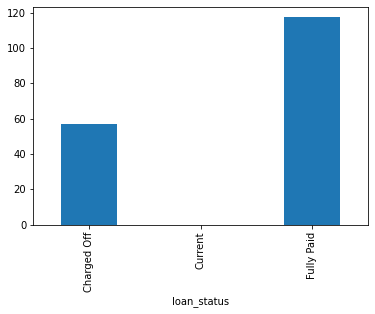

In [64]:
# bar chart for loan status against total payment
(loan_analysis.groupby('loan_status')['total_pymnt'].sum()
 * 100
 / loan_analysis.groupby('loan_status')['loan_amnt'].sum()).plot.bar()
plt.show()

The bank recovers money in % on the different loan status.
- Charged Off     57.13
- Fully Paid     117.24

On fully paid loan company recover 17% more then original amount and in defaulted it recovers 57% of original amount

Important Variables for analysis 
1. loan_amnt
2. term
3. purpose
4. pub_rec_bankruptcy
5. int_rate
6. installment
7. grade and sub_grade
8. emp_title
9. emp_length
10. home_ownership
11. annual_inc
12. verification_status
13. issue_d
14. addr_state
15. dti
16. delinq_2yrs
17. earliest_cr_line
18. inq_last_6mths
19. open_acc
20. pub_rec
21. revol_bal
22. revol_util
23. total_acc
24. out_prncp
25. out_prncp_inv
26. total_pymnt
27. total_pymnt_inv
28. total_rec_prncp
29. total_rec_int
30. total_rec_late_fee
31. recoveries
32. collection_recovery_fee
33. last_pymnt_d
34. last_pymnt_amnt
35. last_credit_pull_d

In [65]:
# Common methods for graphs 

def plot_dist_box(dataframe, col):
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataframe[col]
                , y=dataframe['loan_status']
                , data=dataframe)
    plt.subplot(1, 2, 2)
    ax = sns.distplot(dataframe[col])
    plt.show()
    
def bar_plots(df,array):
    n = int(len(array)/2)
    for idx, val in enumerate(array,start=1):
        plt.subplot(n,3,idx)
        df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl',16))
    plt.tight_layout()
    
    
def plot_default_loan(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status'
                             ,by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    ax = values.plot.bar(color=sns.color_palette('husl'
                                                 , 16))
    ax.set_ylabel('% in dataset'
                  , fontsize=16)
    ax.set_xlabel(by
                  , fontsize=12)
    plt.subplot(1, 2, 2)
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)

1. Variable: __loan_amnt__
    <br>
    Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [66]:
# loan_status against loan_amnt
loan_analysis.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


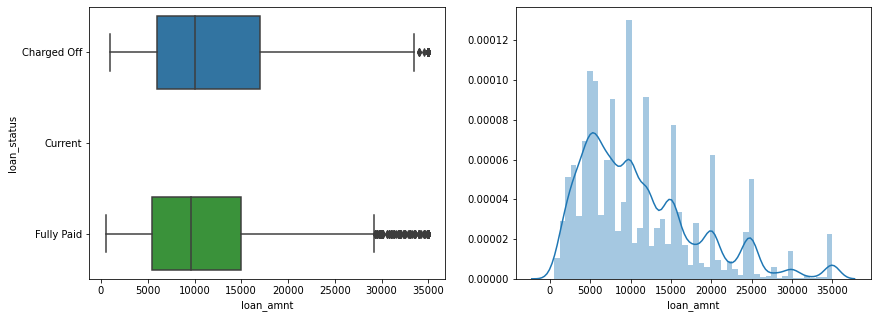

In [67]:
#graph of loan_amount of loan_analysis data frame
plot_dist_box(loan_analysis, 'loan_amnt')

- Most of the loans granted are less than 15000 i.e. 75 percentile value.
- The mean is greater than the median.
- Charged loans shifted towards high average loan amount loans.

In [68]:
# divided into bins for loan_amnts
loan_analysis['loan_amnt_bins'] = pd.cut(loan_analysis['loan_amnt']
       ,[x 
         for x in range(0,36000,5000)]
       ,labels=[
           str(x)+'-'+str(x+5)+'k' 
           for x in range(0,35,5)])

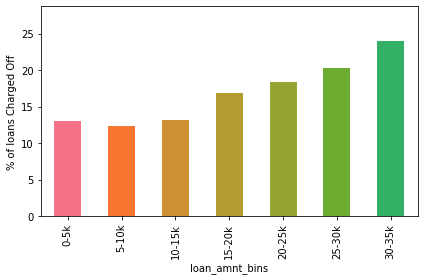

In [69]:
#plot the graph of loan amounts
plot_default_loan(loan_analysis, 'loan_amnt_bins')

- The loans with less amount is less chance of default while the loan with higher in amount is high the chance to default risk.

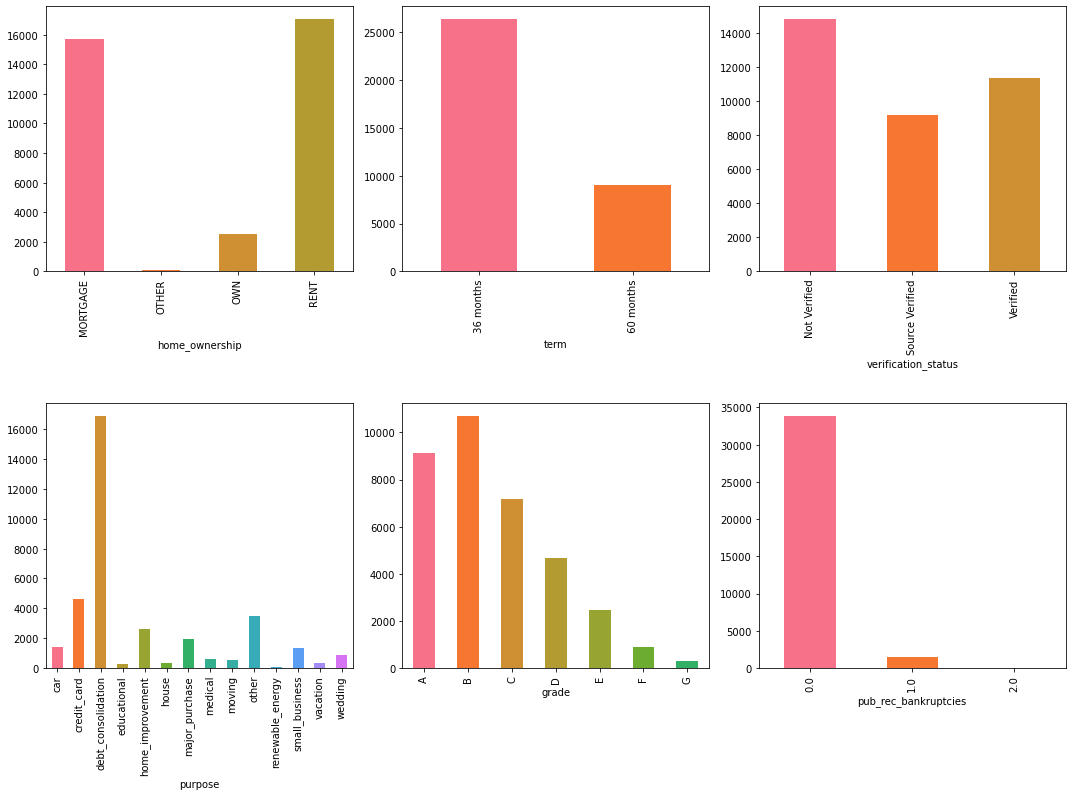

In [70]:
#Bar graphs of different factors 
plt.figure(figsize=(15,15))
bar_plots(loan_analysis, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

- Most Loan is in 36 months of term
- Very few loan for people with prior bankruptcy record
- the most of the loans is taken for debt_consolidation purpose
- Grade B type of loans are the most in number 
- The people have Rent has most number of loans 


2. Variable: __term__
<br>
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

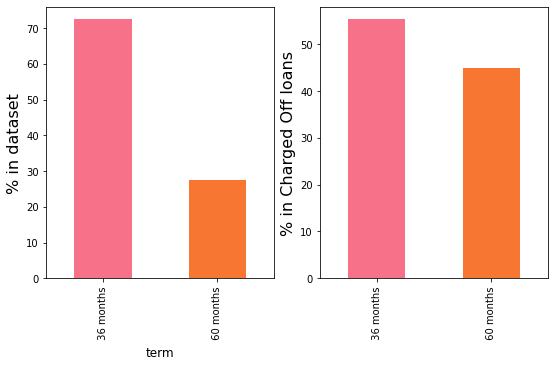

In [71]:
# term analysis 
plt.figure(figsize=(9,5))
plot_percentages(loan_analysis,'term')

- Around 25% of loan given for 60 months term while 75% is for 36 months of term.
- The default rate in 60 months loans is around 45 % while 55% in 36 months of term.

3. Variable: __purpose__
<br>
Data_Dictionary: A category provided by the borrower for the loan request.

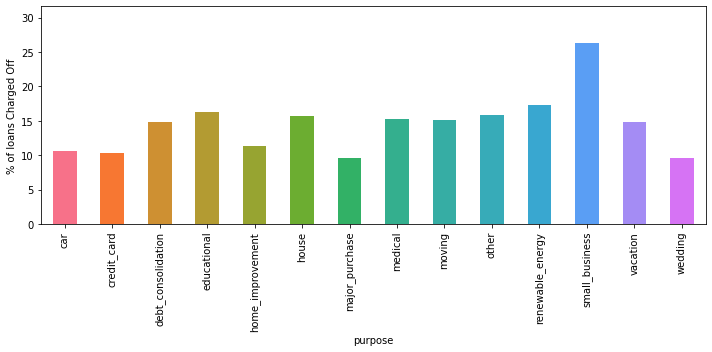

In [72]:
# purpose wise graph plotting
plt.figure(figsize=(10, 5))
plot_default_loan(loan_analysis, 'purpose')

In [73]:
# value counts for purpose
loan_analysis['purpose'].value_counts()

debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

- The chances of Charge Off increse in small_bussiness loan.
- Around 16911 loans is for debt_consolidation i.e. around 49%

4. Variable: __pub_rec_bankruptcy__
<br>
Data_Dictionary: Number of public record bankruptcies

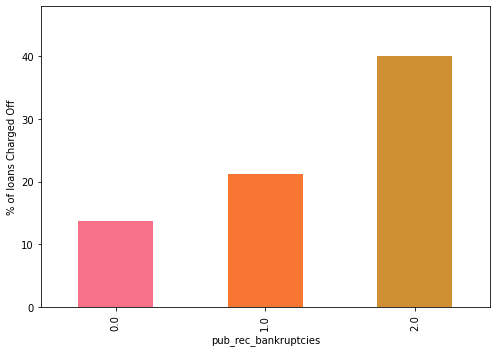

In [74]:
# pub_rec_bankruptcies graph plotting
plt.figure(figsize=(7,5))
plot_default_loan(loan_analysis, 'pub_rec_bankruptcies')

- The percentage of Charge off increases if the loan is given to 2 or more than 2 pub_rec_bankruptcies persons

5. Variable: __int_rate__
<br>
Data_Dictionary: Interest Rate on the loan.

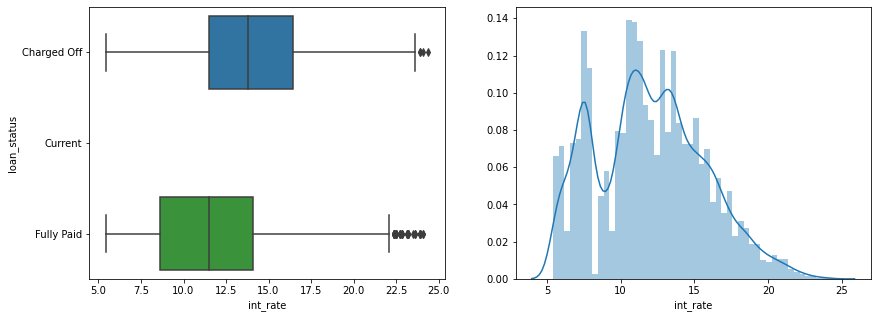

In [75]:
# pub_rec_bankruptcies distribution plots
plot_dist_box(loan_analysis,'int_rate')

In [76]:
loan_analysis.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


- The intrest rate varies from 5.42 to 24.4 percent with average of 11.8
- The intrest rate of charged off is much higher than for fully paid. 

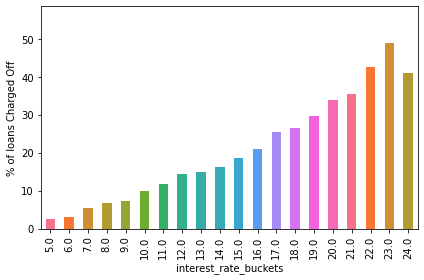

In [77]:
# interest_rate bins creation
loan_analysis['interest_rate_buckets'] = round(loan_analysis['int_rate'])
plot_default_loan(loan_analysis, 'interest_rate_buckets')

6. Variable: __installment__
<br>
Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

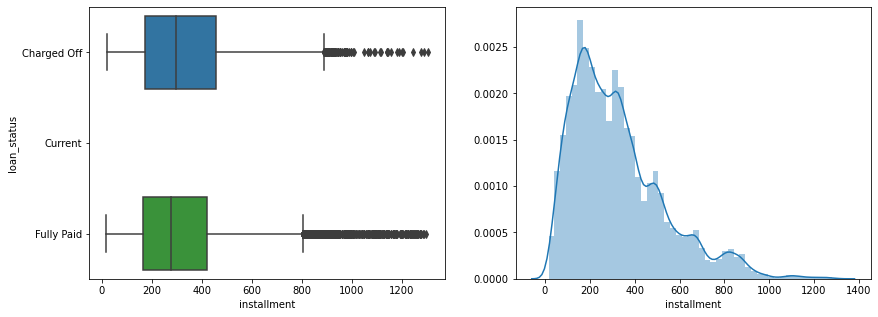

In [78]:
# distrbution plot for installments
plot_dist_box(loan_analysis, 'installment')

In [79]:
loan_analysis.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


- Installments amount varies from 170 to 420 with median 280
- loans Charged off increases for the high installments

7. Variable: __grade and sub_grade__
<br>
Data_Dictionary: LC assigned loan grade and subgrade.

In [80]:
# value counts for grade
loan_analysis.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

In [81]:
# value counts for sugrade
loan_analysis.sub_grade.value_counts().head()

A4    2662
B3    2589
A5    2487
B5    2444
B4    2247
Name: sub_grade, dtype: int64

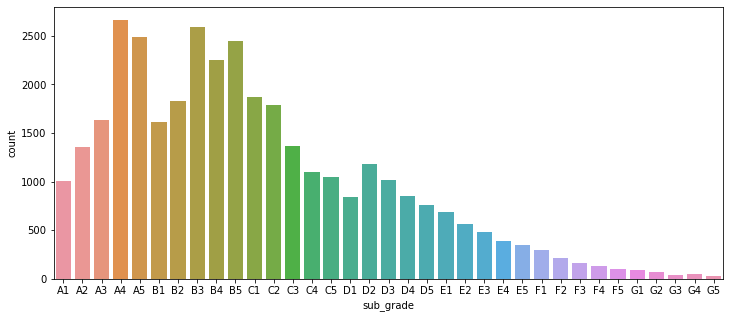

In [82]:
# graph subgrade wise 
plt.figure(figsize=(12,5))
sns.countplot(loan_analysis['sub_grade'], order=sorted(loan_analysis.sub_grade.unique()))
plt.show()

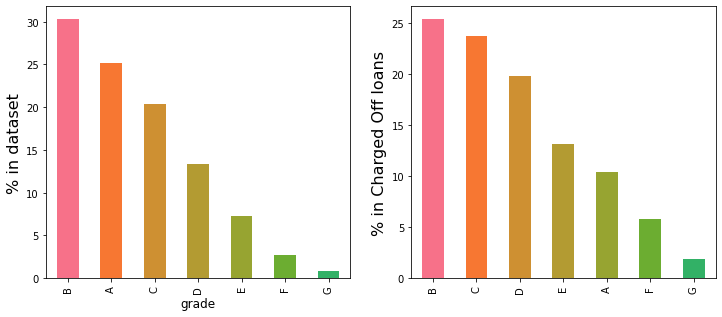

In [83]:
# comparion against numbers vs charged off % 
plt.figure(figsize=(12,5))
plot_percentages(loan_analysis, 'grade', True)

- Grade A and B is looks safe. The percentage in full dataset are much higher than percentage in charged off loans 
- Grade D, E, F, G is very less charge off percentage
- Grade E and onwards are risky so they either refuse loan or charge high intrest rate


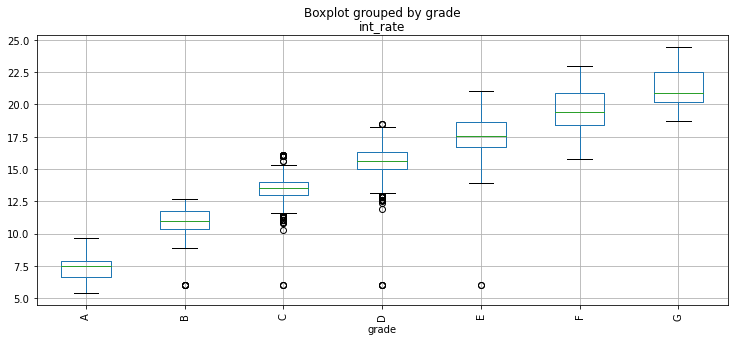

In [84]:
fig,ax = plt.subplots(figsize=(12,5))
loan_analysis.boxplot(column=['int_rate'],by='grade',ax=ax,rot=90)
plt.show()

- The Lending Club charges higher intrest rate for lower grade loans.

8. Variable - __emp_title__
<br>
Data_Dictionary: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [85]:
# emp_title wise value counts 
top10_emp_title = loan_analysis['emp_title'].value_counts().head(10)
top10_emp_title

US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
USAF                  51
UPS                   51
US Air Force          50
Walmart               44
Name: emp_title, dtype: int64

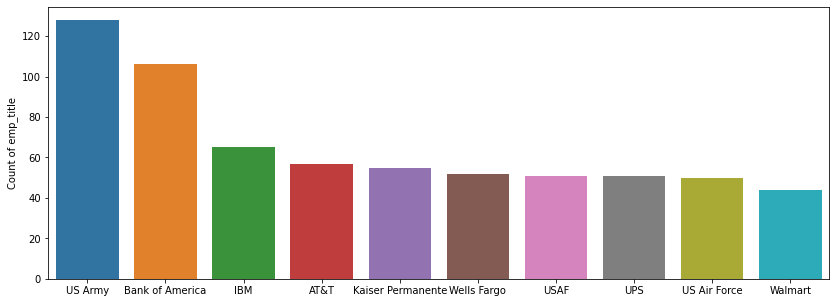

In [86]:
# bar chart for count of loans by emp title 
plt.figure(figsize=(14,5))
sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values).set_ylabel('Count of emp_title')
plt.show()

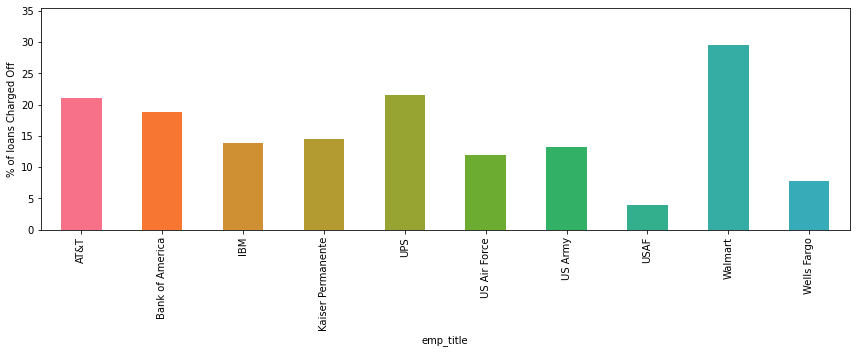

In [87]:
# bar chart for default % of loans by emp title 
plt.figure(figsize=(12,5))
plot_default_loan(loan_analysis[loan_analysis['emp_title'].isin(top10_emp_title.index.values)],'emp_title')

- Max loans taken by the US army and Bank of America followed by IBM and AT&T
- The max default rate is of loans is of Walmart and UPS 

9. Variable - __emp_length__
<br>
Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [88]:
# value count of emp_length
loan_analysis.emp_length.value_counts()

10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: emp_length, dtype: int64

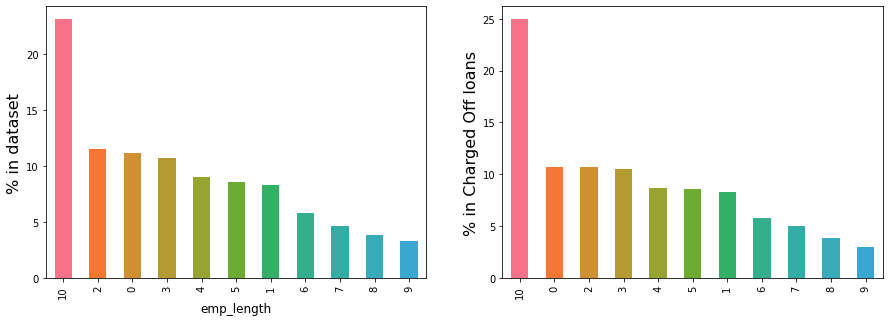

In [89]:
# comparison charts of count and % of emp_length wise loans 
plt.figure(figsize=(15,5))
plot_percentages(loan_analysis,'emp_length')

- Around 22.7% loans given to those whose experience is more than 10 years
- It seems no impact of employment length on default rate 

10. Variable - __home_ownership__
<br>
Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

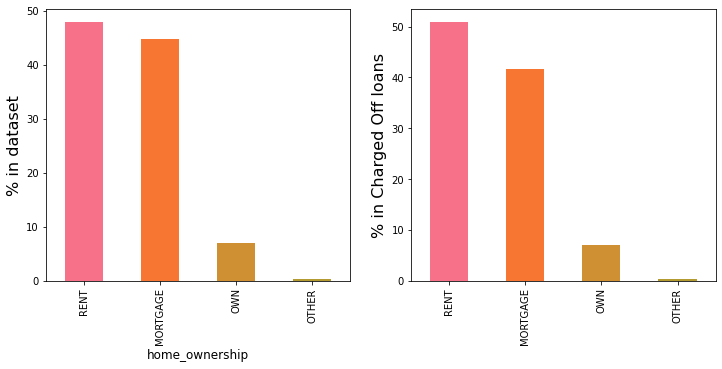

In [90]:
# comparison charts of count and % of home_ownership wise loans 
plt.figure(figsize=(12,5))
plot_percentages(loan_analysis, 'home_ownership')

- It seems not impact of ownership of home and default rate 

11. Variable - __annual_inc__
<br>
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

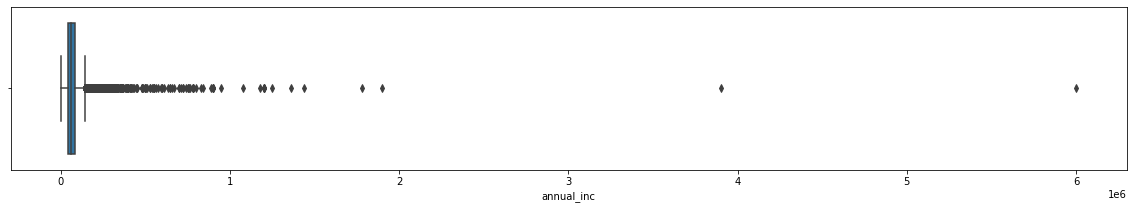

In [91]:
# annual income wise box plot
plt.figure(figsize=(20, 3))
sns.boxplot(x=loan_analysis['annual_inc'], data=loan_analysis)
plt.show()

- It clearly show there is an outliars present from range 4-6 

In [92]:
# Removal of outliars 
df = loan_analysis[loan_analysis['annual_inc']<300000]
df.annual_inc.describe()

count     35178.000000
mean      66591.220524
std       36698.669917
min        4000.000000
25%       41050.750000
50%       59700.000000
75%       82000.000000
max      294000.000000
Name: annual_inc, dtype: float64

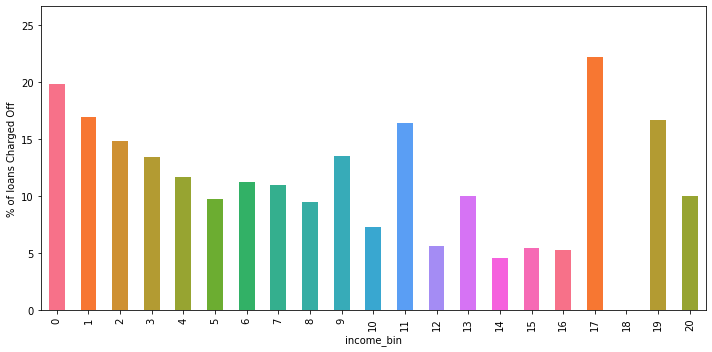

In [93]:
# graph of annual income after divided the data into bins 
loan_analysis['income_bin'] = (loan_analysis['annual_inc']/20000).astype(int)
plt.figure(figsize=(10,5))
plot_default_loan(loan_analysis.loc[loan_analysis['income_bin']<21], 'income_bin')

- Loan Defaults are much higher for the lower in income

12. Variable - __verification_status__
<br>
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [94]:
# verification_status value counts
loan_analysis['verification_status'].value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

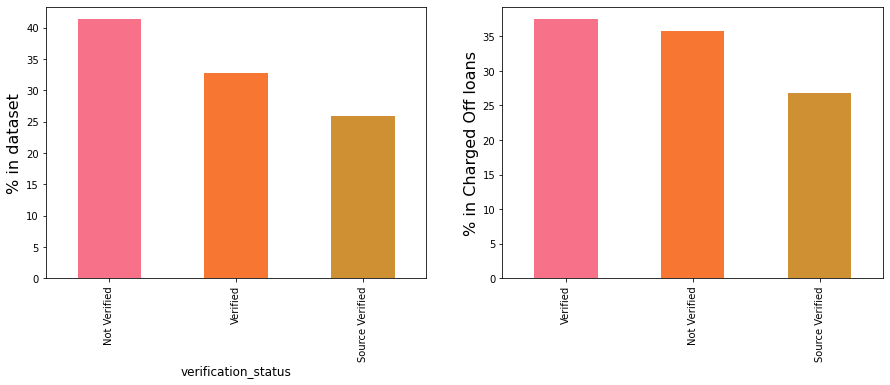

In [95]:
# comparison charts of count and default % of verification_status wise loans 
plt.figure(figsize=(15,5))
plot_percentages(loan_analysis, 'verification_status')

- The Not verified Loans number is more than others that is not pridictable
- The verified loans contains the more default rate than others i.e. very unexpected

13. Variable: __issue_d__
<br>Data_Dictionary: The month which the loan was funded

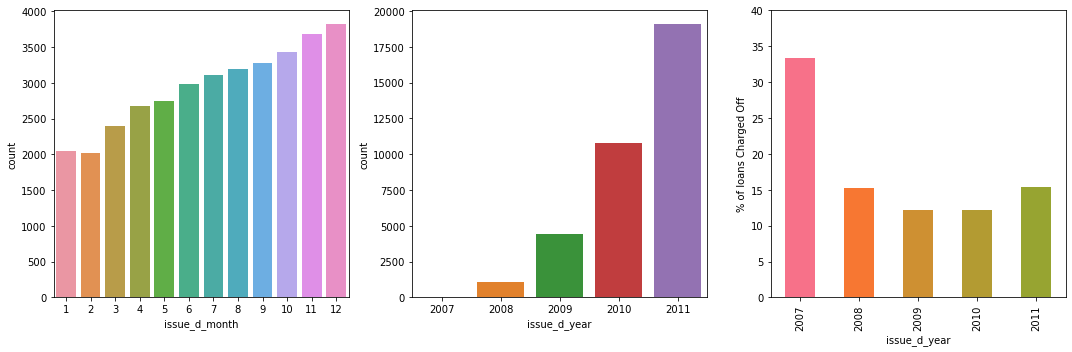

In [96]:
#  comparison charts of count and default % of  issue_d wise loans 
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan_analysis['issue_d_month'], order=sorted(loan_analysis['issue_d_month'].unique()))
plt.subplot(1, 3, 2)
sns.countplot(loan_analysis['issue_d_year'], order=sorted(loan_analysis['issue_d_year'].unique()))
plt.subplot(1, 3, 3)
plot_default_loan(loan_analysis, 'issue_d_year')
plt.show()

- The number of loans increasing year by year
- December is the month when the most loan issued 
- The loans defualt rate is very high in 2007 
- year of loan has no significant effect on defualt loans

14. Variable - __title__
<br>Data_Dictionary: The loan title provided by the borrower

In [97]:
# description of title column
loan_analysis.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

In [98]:
# value counts of title coulmn
loan_analysis.title.value_counts().head(10)

Debt Consolidation           1975
Debt Consolidation Loan      1541
Personal Loan                 589
Consolidation                 462
debt consolidation            440
Credit Card Consolidation     325
Home Improvement              324
Debt consolidation            303
Personal                      281
Credit Card Loan              280
Name: title, dtype: int64

- It can contains the same information that contains the column purpose so no need to analyse drop this column

In [99]:
# dropping
loan_analysis = loan_analysis.drop('title',axis =1 )

15. Variable - __addr_state__
<br>Data_Dictionary: The state provided by the borrower in the loan application

In [100]:
# % wise loan of addr_state
round(loan_analysis.groupby('addr_state')['addr_state'].count()
      /len(loan_analysis['addr_state'])*100,2).sort_values(ascending=False).head(10)

addr_state
CA    18.08
NY     9.57
FL     7.17
TX     6.94
NJ     4.71
IL     3.90
PA     3.88
VA     3.56
GA     3.54
MA     3.34
Name: addr_state, dtype: float64

- The maximum loads i.e. 18% are from california following with New york with 9.57%
- There is no significant effect on default rate

16. Variable - __dti__
<br>
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [101]:
# dti column description
loan_analysis.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

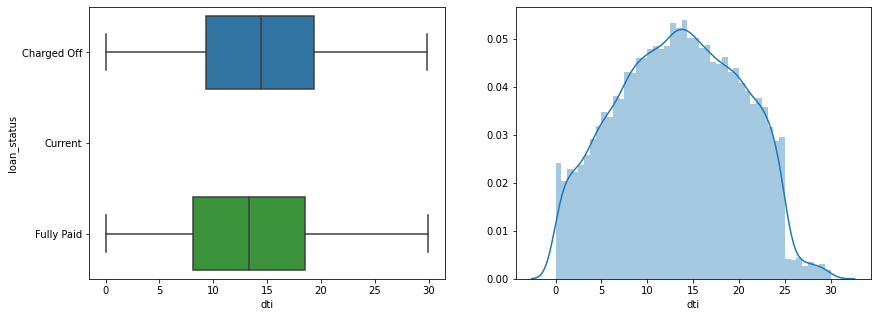

In [102]:
# distribution plots for dti column
plot_dist_box(loan_analysis,'dti')

In [103]:
# divide dti into bins
loan_analysis['dti_bin'] = pd.cut(loan_analysis['dti'],[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
loan_analysis['dti_bin'].value_counts()

10-15    8901
15-20    8170
5-10     7125
20-25    6164
0-5      4292
25-30     575
Name: dti_bin, dtype: int64

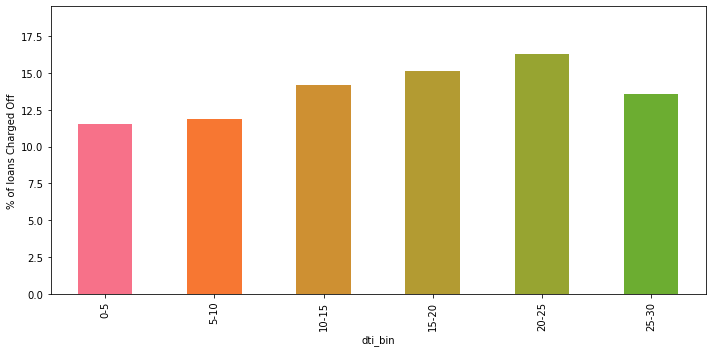

In [104]:
# plot of defulats data with dti bins
plt.figure(figsize=(10,5))
plot_default_loan(loan_analysis, 'dti_bin')

- When the dti and debt payment is higher than 20, higher the loan default percentage
- higher the dti high the charge off values 

17. Variable - __delinq_2yrs__
<br>Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [105]:
# value counts of delinq_2yrs
loan_analysis.delinq_2yrs.value_counts()

0     31533
1      2939
2       614
3       189
4        53
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

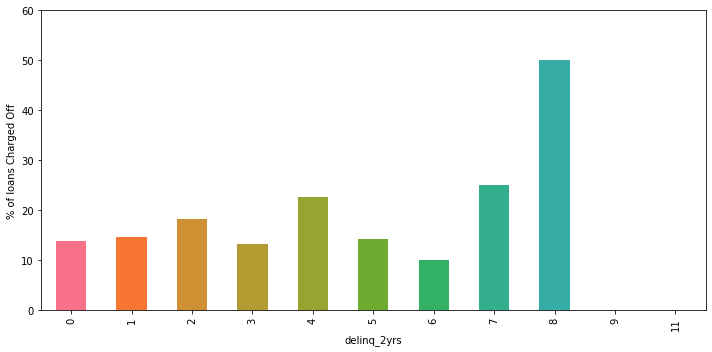

In [106]:
# default loans plot with delinq_2yrs 
plt.figure(figsize=(10,5))
plot_default_loan(loan_analysis, 'delinq_2yrs')

- There is high chances of default when the value is greater than 1 and less than 8

18. Variable - __earliest_cr_line__
<br>Data_Dictionary: The month the borrower's earliest reported credit line was opened.

In [107]:
#  earliest_cr_line value counts 
loan_analysis['earliest_cr_line_year'].value_counts()

2000    2947
1999    2695
1998    2569
2001    2308
1997    2207
1996    2003
1995    1903
1994    1785
2002    1762
2003    1698
2004    1606
2005    1381
1993    1347
2006    1065
1992     937
1990     915
1991     853
1989     755
2007     655
1988     643
1987     539
1986     428
1985     385
1984     349
1983     282
1982     188
1981     149
1980     145
2008     139
1979     133
1978     126
1977      87
1976      70
1975      57
1974      49
1973      39
1970      35
1971      33
1972      29
1969      22
1967      12
1968      12
1966       7
1965       5
1963       4
1962       3
1964       2
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

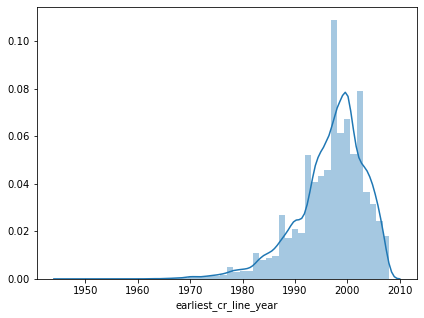

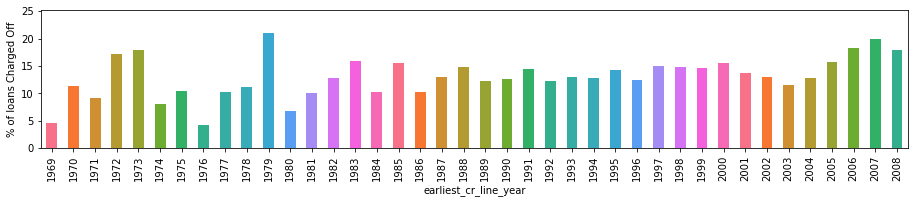

In [108]:
# distribution and default loan bar plot for  earliest_cr_line
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(loan_analysis['earliest_cr_line_year'])
plt.show()
plt.figure(figsize=(25,5))
plt.subplot(2, 2, 1)
plot_default_loan(loan_analysis[loan_analysis['earliest_cr_line_year']>1968],'earliest_cr_line_year')
plt.show()

- 8% of loan applicants have 2000 and above as the year of credit line.
- newer borrowers are default more as compared to older borrowers only 1968 is exception 
- in 1978 and 1979 at that time the default rate is high as compared to adjecent year 

19. Variable - __inq_last_6mths__
<br>
Data_Dictionary: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [109]:
# value counts of nq_last_6mths
loan_analysis.inq_last_6mths.value_counts()

0    17183
1     9774
2     5208
3     2703
4      280
5      123
6       54
7       31
8       11
Name: inq_last_6mths, dtype: int64

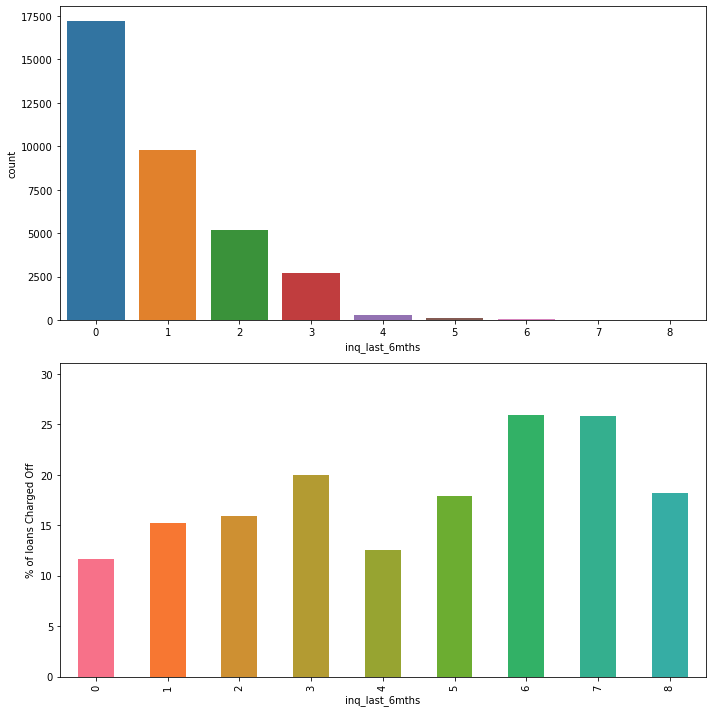

In [110]:
# count and % of defualt plots of nq_last_6mths
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.countplot(loan_analysis['inq_last_6mths'])
plt.subplot(2, 1, 2)
plot_default_loan(loan_analysis, 'inq_last_6mths')
plt.show()

- 48.5 % of borrower doesn't make any inquiry
- Those who make 2 or more than 2 inquiry is high default rates


20. Variable - __open_acc__
<br>
Data_Dictionary: The number of open credit lines in the borrower's credit file.

In [111]:
# description of open_acc 
loan_analysis['open_acc'].describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

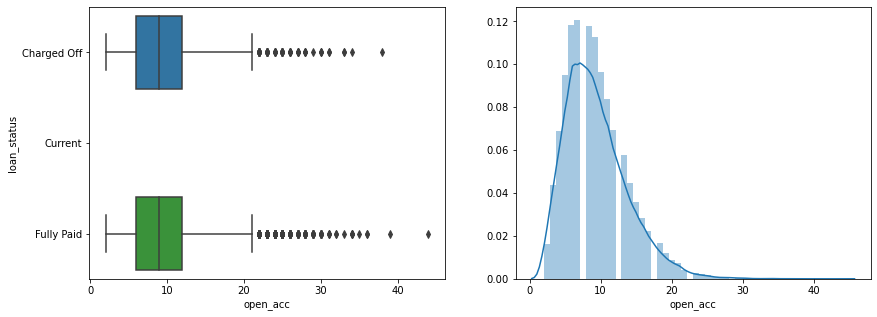

In [112]:
# distributions plots of open_acc
plot_dist_box(loan_analysis,'open_acc')

In [113]:
loan_analysis.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


- The large number of borrowers seem to have 9 open credit lines.
- There is no significant difference in between credit lines and fully paid loans

21. Variable - __pub_rec__
<br>Data_Dictionary: Number of derogatory public records.

In [114]:
# value_counts of pub_rec
loan_analysis['pub_rec'].value_counts()

0    33516
1     1798
2       44
3        7
4        2
Name: pub_rec, dtype: int64

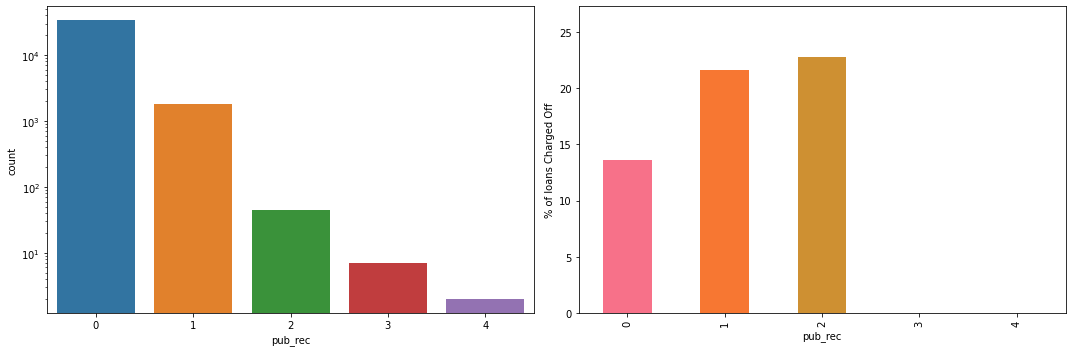

In [115]:
# count and default rate % graph of pub_rec
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(loan_analysis['pub_rec']).set_yscale('log')
plt.subplot(1, 2, 2)
plot_default_loan(loan_analysis, 'pub_rec')
plt.show()

- 94% people have no public derogatory records
- 1 derogatory record or more than one increases the chances of charge off

22. Variable - __revol_bal__
<br>
Data_Dictionary: Total credit revolving balance

In [116]:
# description of revol_bal
loan_analysis['revol_bal'].describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

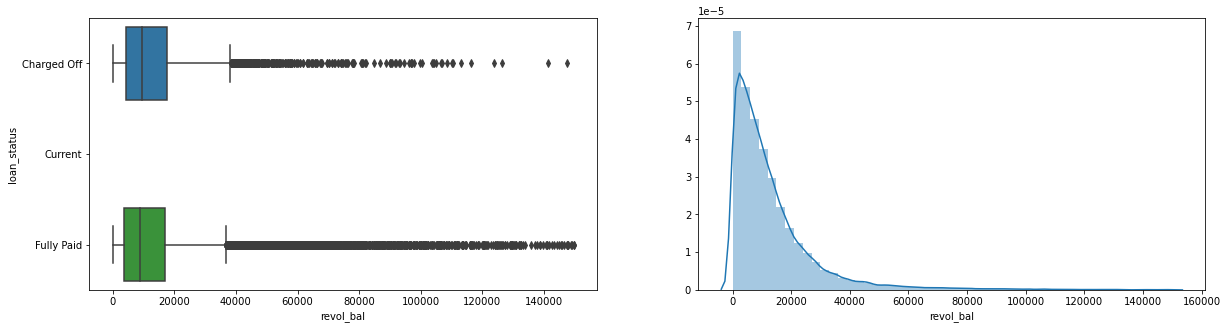

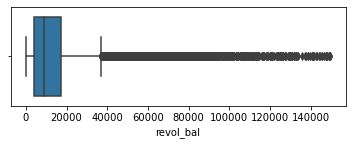

In [117]:
# distribution plots for revol_bal
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x=loan_analysis['revol_bal'], y=loan_analysis['loan_status'], data=loan_analysis)
plt.subplot(1, 2, 2)
sns.distplot(loan_analysis['revol_bal'])
plt.show()
plt.subplot(2, 1,1)
sns.boxplot(x=loan_analysis['revol_bal'], data=loan_analysis)
plt.show()

In [118]:
loan_analysis.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13680.089824,14768.969553,0.0,4246.5,9562.0,17809.0,147365.0
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,30424.0,13316.918847,15820.937992,0.0,3711.0,8833.0,16941.0,149588.0


- There is no chnage between balance mean for charged off and fully paid loans 

23. Variable - __revol_util__
<br>Data_Dictionary:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [119]:
# description of revol_util
loan_analysis['revol_util'].describe()

count    35367.000000
mean        49.139015
std         28.228038
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

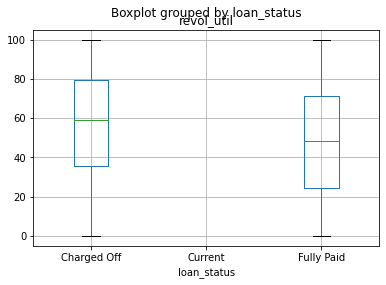

In [120]:
# box plot of revol_util
loan_analysis.boxplot(column=['revol_util'],by='loan_status')
plt.show()

- The average utilization rate is around 49% for fully paid and the average utilization rate of charged off is higher as compared to fully paid

24. Variable - __total_acc__
<br>
Data_Dictionary: The total number of credit lines currently in the borrower's credit file.

In [121]:
# description of total_acc
loan_analysis.total_acc.describe()

count    35367.000000
mean        22.209206
std         11.403045
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

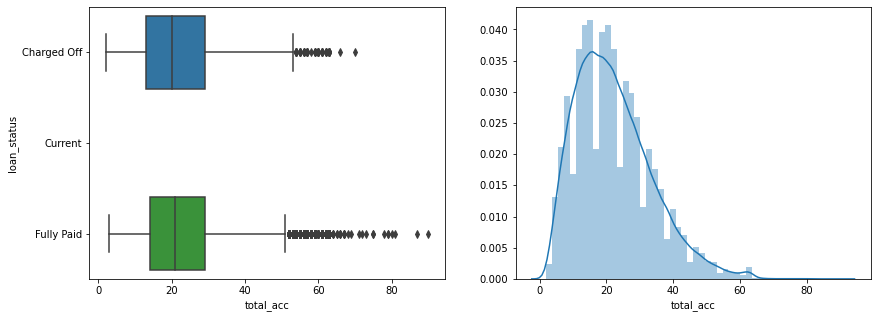

In [122]:
# distribution and box plot of total_acc
plot_dist_box(loan_analysis, 'total_acc')

- There are average 22 credit lines for the borrowers
- No big difference is observed in charged Off and Fully paid

25. Variable - __out_prncp__
<br>
Data_Dictionary: Remaining outstanding principal for total amount funded.

In [123]:
loan_analysis.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,30424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- This variable doesn't contribute in the analysis we remove this column 

In [124]:
# dropping
loan_analysis = loan_analysis.drop('out_prncp',axis=1)

26. Variable - __out_prncp_inv__
<br>
Data_Dictionary: Remaining outstanding principal for portion of total amount funded by investors

In [125]:
loan_analysis.groupby('loan_status')['out_prncp_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,30424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- This variable doesn't contribute in the analysis we remove this column 

In [126]:
# dropping
loan_analysis = loan_analysis.drop('out_prncp_inv',axis=1)

27. Variable - __total_pymnt__
<br>
Data_Dictionary: Payments received to date for total amount funded.

In [127]:
# description of total_pymnt
loan_analysis.total_pymnt.describe()

count    35367.000000
mean     12020.407386
std       8817.192500
min         33.730000
25%       5602.510000
50%       9865.710000
75%      16300.485000
max      58563.680000
Name: total_pymnt, dtype: float64

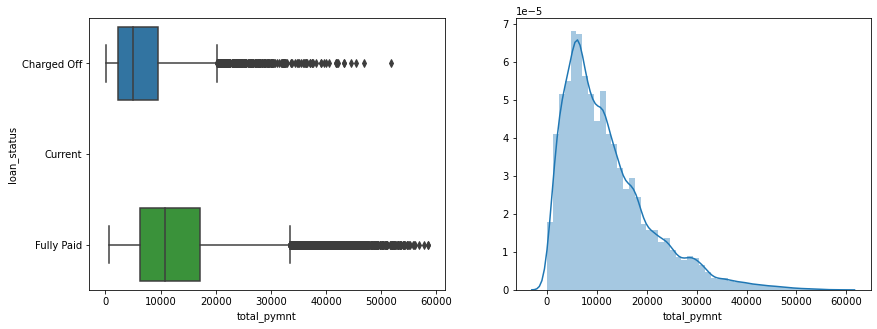

In [128]:
# distribution and box plot of total_pymnt
plot_dist_box(loan_analysis,'total_pymnt')

- The average payment received in case charged off is less than the fully paid loan 
- this variable may not contribute in analysis so we can drop this column 

In [129]:
# dropping
loan_analysis = loan_analysis.drop('total_pymnt',axis=1)

28. Variable - __total_pymnt_inv__
<br>
Data_Dictionary: Payments received to date for portion of total amount funded by investors.

- This Varibale may not be available at the time of loan. we drop this variable from analysis.

In [130]:
# dropping
loan_analysis = loan_analysis.drop('total_pymnt_inv',axis=1)

29. Variable - __total_rec_prncp__
<br>
Data_Dictionary: Principal received to date

- this variable may not contribute in analysis so we can drop this column

In [131]:
# dropping
loan_analysis = loan_analysis.drop('total_rec_prncp',axis=1)

30. Variable - __total_rec_int__
<br>
Data_Dictionary: Interest received to date.

- this variable may not contribute in analysis so we can drop this column

In [132]:
# dropping
loan_analysis = loan_analysis.drop('total_rec_int',axis=1)

31. Variable - __total_rec_late_fee__
<br>
Data_Dictionary: Late fees received to date.

- this variable may not contribute in analysis so we can drop this column

In [133]:
# dropping
loan_analysis = loan_analysis.drop('total_rec_late_fee',axis=1)

32. Variable - __recoveries__
<br>
Data_Dictionary: post charge off gross recovery.

- This variable doesn't contribute in analysis . drop this column

In [134]:
# dropping
loan_analysis = loan_analysis.drop('recoveries',axis=1)

33. Variable - __collection_recovery_fee__
<br>
Data_Dictionary: post charge off collection fee.

- This variable is not contributing in the analysis drop such columns

In [135]:
# dropping
loan_analysis = loan_analysis.drop('collection_recovery_fee',axis=1)

34. Variable - __last_pymnt_d__
<br>
Data_Dictionary: Last month payment was received.

In [136]:
# value counts for last_pymnt_d column
loan_analysis['last_pymnt_d'].value_counts()

2013-03-01    967
2014-12-01    875
2013-05-01    856
2013-02-01    816
2012-03-01    799
             ... 
2008-05-01      5
2008-09-01      5
2008-12-01      5
2008-11-01      4
2008-06-01      2
Name: last_pymnt_d, Length: 97, dtype: int64

In [137]:
# split it into year and month
loan_analysis['last_pymnt_d_month']= loan_analysis['last_pymnt_d'].dt.month
loan_analysis['last_pymnt_d_year']= loan_analysis['last_pymnt_d'].dt.year

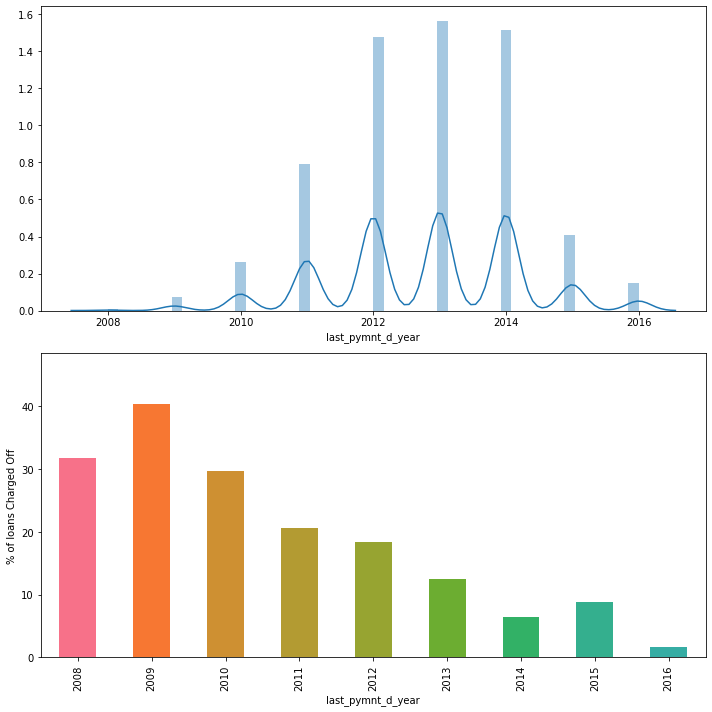

In [138]:
# Charts for year analysis
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.distplot(loan_analysis['last_pymnt_d_year'])
plt.subplot(2, 1, 2)
plot_default_loan(loan_analysis,'last_pymnt_d_year')

- around 75% of the payment dates are during 2012-2014 period.
- the variable doesn't impact on analysis

35. Variable - __last_pymnt_amnt__
Data_Dictionary: Last total payment amount received.

In [139]:
# description of last_pymnt_amnt 
loan_analysis['last_pymnt_amnt'].describe()

count    35367.00000
mean      2813.59290
std       4521.49033
min          0.01000
25%        224.78500
50%        602.58000
75%       3604.44500
max      36115.20000
Name: last_pymnt_amnt, dtype: float64

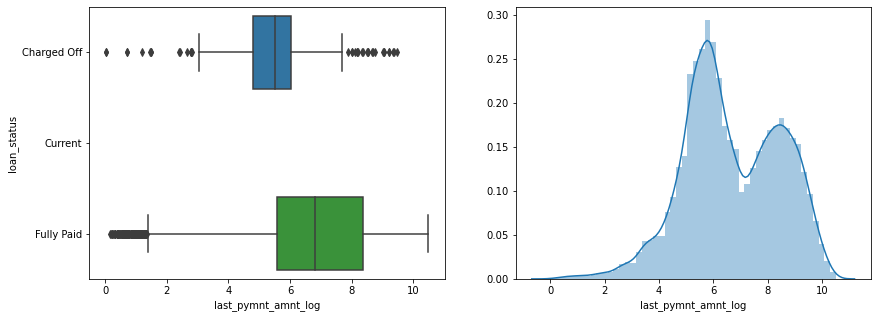

In [140]:
# box and distribution plot of last_pymnt_amnt
loan_analysis['last_pymnt_amnt_log'] = loan_analysis['last_pymnt_amnt'].apply(lambda x : np.log(x+1))
plot_dist_box(loan_analysis, 'last_pymnt_amnt_log')

- The last payment received in lower than charge off this is expected.

36. Variable - __last_credit_pull_d__
<br>
Data_Dictionary: The most recent month LC pulled credit for this loan.

In [141]:
# value counts for last_credit_pull_d column
loan_analysis['last_credit_pull_d'].value_counts()

2016-05-01    8718
2016-04-01    2232
2016-03-01    1058
2013-02-01     768
2016-02-01     683
              ... 
2008-08-01       3
2008-09-01       3
2008-12-01       3
2008-05-01       1
2008-06-01       1
Name: last_credit_pull_d, Length: 96, dtype: int64

In [142]:
# split it into year and month 
loan_analysis['last_credit_pull_d_month']= loan_analysis['last_credit_pull_d'].dt.month
loan_analysis['last_credit_pull_d_year']= loan_analysis['last_credit_pull_d'].dt.year

In [143]:
# value count year wise 
loan_analysis['last_credit_pull_d_year'].value_counts()

2016    13297
2014     5719
2015     5138
2013     4772
2012     3742
2011     1902
2010      633
2009      145
2008       19
Name: last_credit_pull_d_year, dtype: int64

In [144]:
# value count month wise 
loan_analysis['last_credit_pull_d_month'].value_counts()

5     10503
4      3901
3      3008
2      2763
12     2174
11     2018
9      1925
10     1880
7      1870
1      1861
8      1852
6      1612
Name: last_credit_pull_d_month, dtype: int64

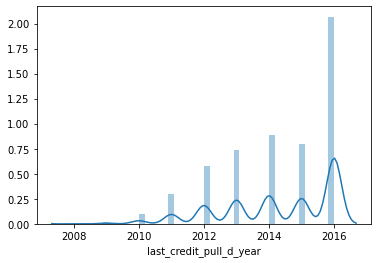

In [145]:
# year wise plot 
sns.distplot(loan_analysis['last_credit_pull_d_year'])
plt.show()

- The Bank pulling more credits in 2016, suggesting company is serious on bad loans.
- This is not contributing factor in our analysis

#### There are some derived variable - ratio of loan amount to annual income

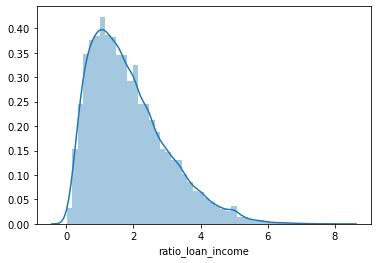

In [146]:
loan_analysis['ratio_loan_income'] = (loan_analysis['loan_amnt'] 
                                      * 10 
                                      / loan_analysis['annual_inc'])
sns.distplot(loan_analysis['ratio_loan_income'])
plt.show()

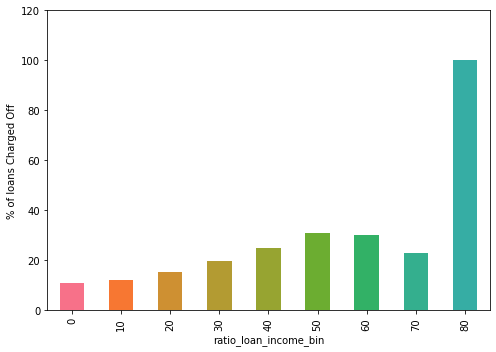

In [147]:
# charged off % plot against ratio_loan_income
loan_analysis['ratio_loan_income_bin'] = (loan_analysis['ratio_loan_income'].astype(int)) * 10
plt.figure(figsize=(7,5))
plot_default_loan(loan_analysis, 'ratio_loan_income_bin')

- As long as loan amount is less than 20% of the income the default rate is less.
- the default rate is high when the amount is greater than 30%

---
## Bivariate Analysis

---
#### loan_amnt vs time

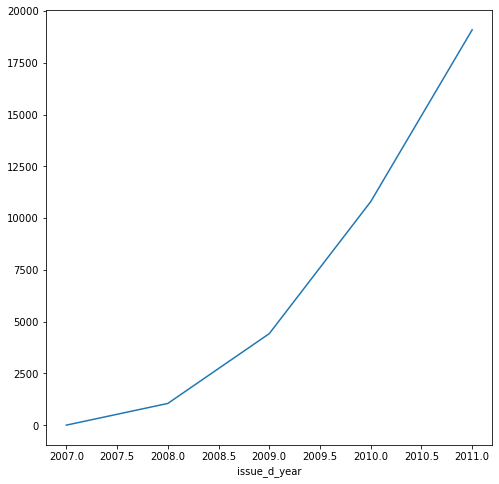

In [148]:
# line chart
plt.figure(figsize=(8,8))
loan_analysis.groupby('issue_d_year').loan_amnt.count().plot(kind='line')
plt.show()

---
#### Avg. loan_amnt vs time

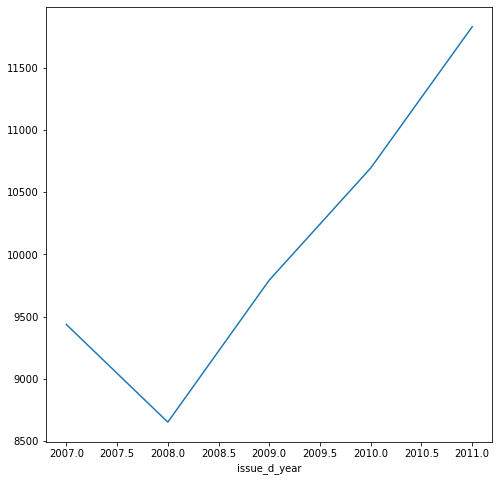

In [149]:
# line chart 
plt.figure(figsize=(8,8))
loan_analysis.groupby('issue_d_year').loan_amnt.mean().plot(kind='line')
plt.show()

- There is a rise fall at 2008

---
#### loan_amnt vs grade

<Figure size 864x576 with 0 Axes>

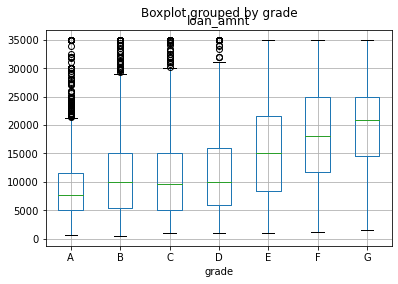

In [150]:
# box plot
plt.figure(figsize=(12,8))
loan_analysis.boxplot(column='loan_amnt', by='grade')
plt.show()

---
####  loan_amnt vs annual_inc

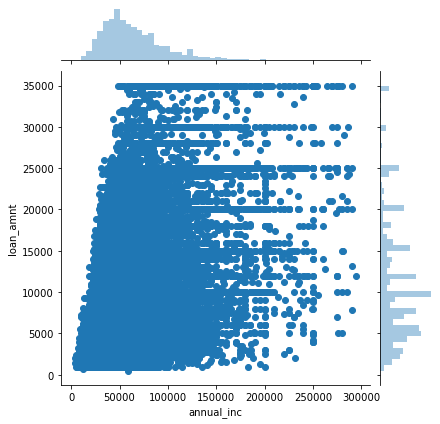

In [151]:
# joint plot 
sns.jointplot('annual_inc', 'loan_amnt', loan_analysis[loan_analysis['annual_inc']< 300000])
plt.show()

- There are people whose average income is lower than 50000 taking loans 25000 or higher. Those loans are risky for company 

---
#### loan_amnt vs verification_status vs loan status

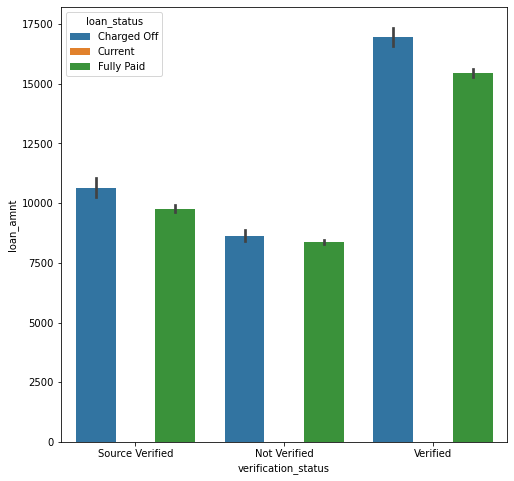

In [152]:
# bar chart
plt.figure(figsize=(8,8))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_analysis, estimator=np.mean)
plt.show()

#### annual income vs grade

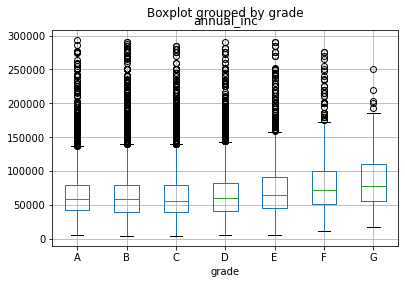

In [153]:
# box plot
loan_analysis[loan_analysis['annual_inc']<300000].boxplot(column='annual_inc', by='grade')
plt.show()

- Higher loan amount is verified more 
- larger loans are less in number with high intrest rate

---
#### Interest Rate and Term

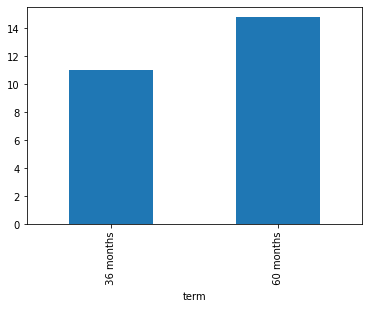

In [154]:
# bar plot
loan_analysis.groupby('term')['int_rate'].mean().plot.bar()
plt.show()

- Large amounts is given for loans for higher term. the rate of intrest is also large 

---
#### Interest Rate vs Sub Grade

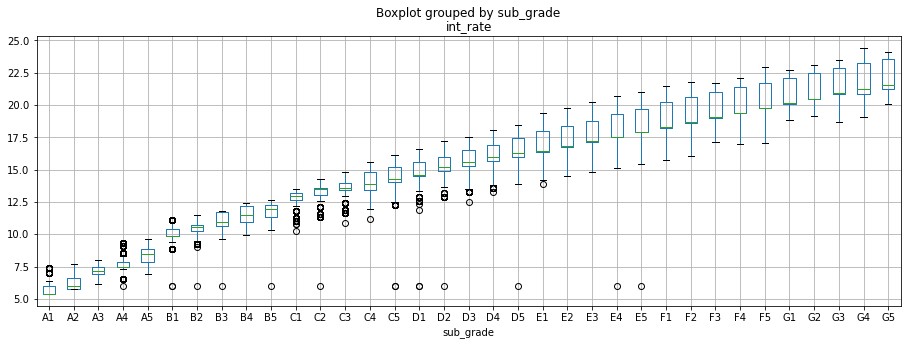

In [155]:
# box plot
loan_analysis.boxplot(column='int_rate', by='sub_grade',figsize=(15,5))
plt.show()

- Interest rates directly with the subgrade. larger the subgrade higher the intrest rate 

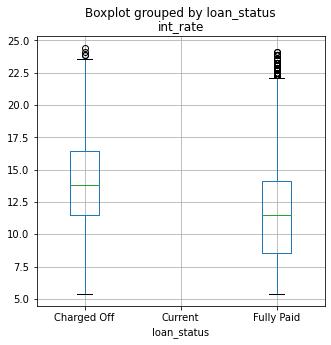

In [156]:
# box plot
loan_analysis.boxplot(column='int_rate', by='loan_status',figsize=(5,5))
plt.show()

. Loans at higher intrest rate are more charged off

---
#### Loan amount vs Grade vs Term

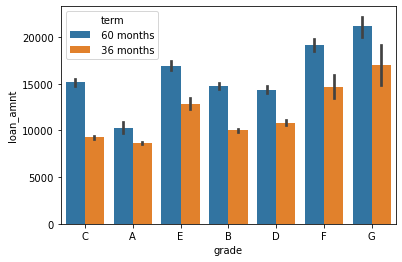

In [157]:
# bar chart 
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_analysis, estimator=np.mean)
plt.show()

- Higher loan amount with lower grade for longer terms 

---
#### Loan amount Vs term Vs Loan Status

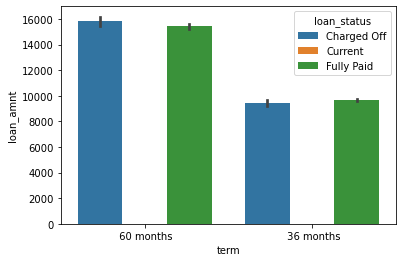

In [158]:
# bar plot 
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_analysis, estimator=np.mean)
plt.show()

- Higher loan amount and with longer term and see higher default rate of loans 

---
#### revol_util Vs grade Vs Loan Status

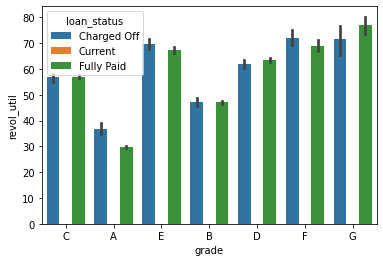

In [159]:
# bar chart 
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan_analysis, estimator=np.mean)
plt.show()

- revol_util and grade are correlated. higher loan amounts related to with higher grades 

---
#### revol_rate Vs int_rate

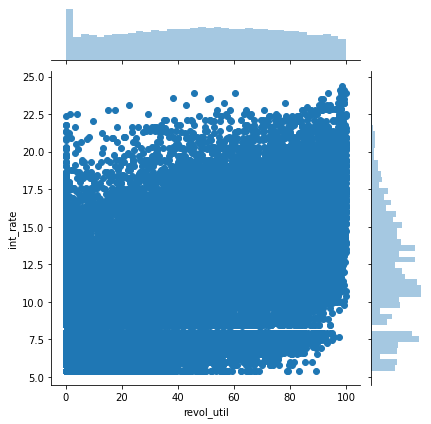

In [160]:
# joint plot 
sns.jointplot('revol_util', 'int_rate', loan_analysis)
plt.show()

---
#### revol_util vs Grade

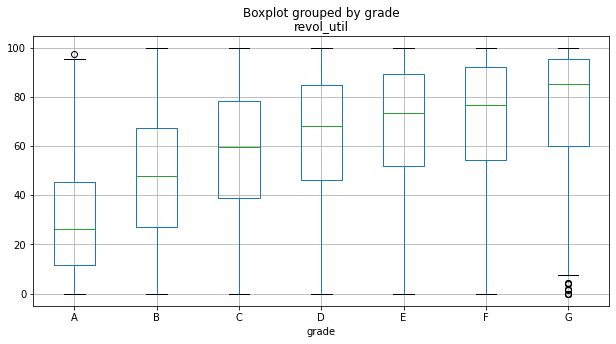

In [161]:
# box plot
loan_analysis.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [162]:
# correlation between loan amount variable with others 
relation = loan_analysis.corr()
relation['loan_amnt']

loan_amnt                   1.000000
int_rate                    0.299997
installment                 0.930743
emp_length                  0.144922
annual_inc                  0.258984
dti                         0.063093
delinq_2yrs                -0.035290
inq_last_6mths              0.010000
open_acc                    0.174265
pub_rec                    -0.046942
revol_bal                   0.319781
revol_util                  0.067081
total_acc                   0.255773
last_pymnt_amnt             0.477646
pub_rec_bankruptcies       -0.030431
earliest_cr_line_month     -0.016516
earliest_cr_line_year      -0.195540
issue_d_month               0.051358
issue_d_year                0.116198
interest_rate_buckets       0.299979
income_bin                  0.260190
last_pymnt_d_month         -0.004592
last_pymnt_d_year           0.103771
last_pymnt_amnt_log         0.399026
last_credit_pull_d_month   -0.014681
last_credit_pull_d_year     0.057634
ratio_loan_income           0.616612
r

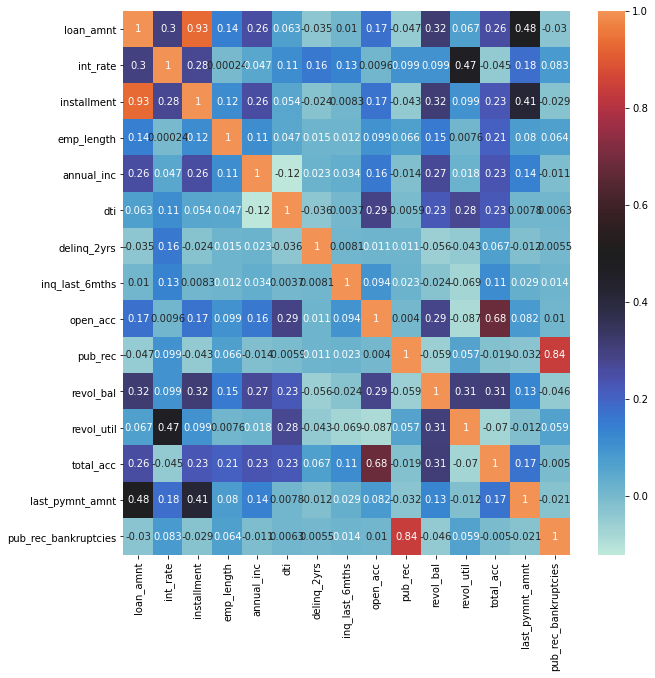

In [163]:
# heat map 
plt.figure(figsize=(10,10))
relation = loan_analysis[['loan_amnt'
                          , 'int_rate'
                          , 'installment'
                          , 'emp_length'
                          , 'annual_inc'
                          ,'dti'
                          , 'delinq_2yrs'
                          , 'earliest_cr_line'
                          ,'inq_last_6mths'
                          , 'open_acc'
                          , 'pub_rec'
                          , 'revol_bal'
                          , 'revol_util'
                          ,'total_acc'
                          , 'last_pymnt_d'
                          , 'last_pymnt_amnt'
                          , 'last_credit_pull_d'
                          ,'pub_rec_bankruptcies']].corr()
sns.heatmap(relation, annot=True, center=0.5)
plt.show()

- loan_amnt is correlated to last_paymnt_amnt with r factor .44
- The company is charging higher interest from risker loan. int_rate is correlated to revol_util with r factor of .47 
- loan_amnt revol_bal are correlated with factor .35 . it suggest that higher loan amount is being to risker clients

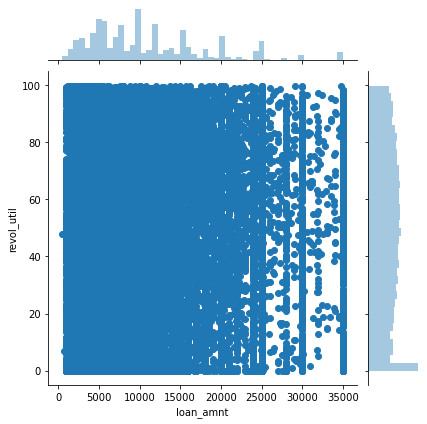

In [164]:
# joint plt to prove above heat map results
sns.jointplot('loan_amnt','revol_util',loan_analysis)
plt.show()

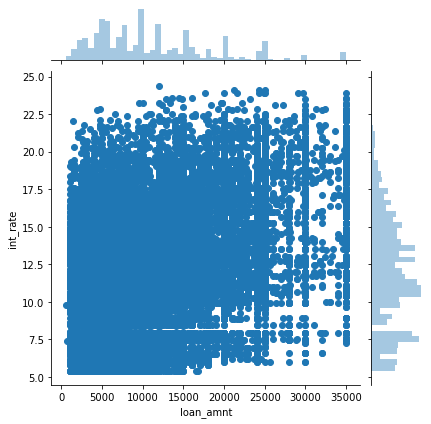

In [165]:
# joint plt to prove above heat map results
sns.jointplot('loan_amnt', 'int_rate', loan_analysis)
plt.show()

---
####  dti vs open_acc

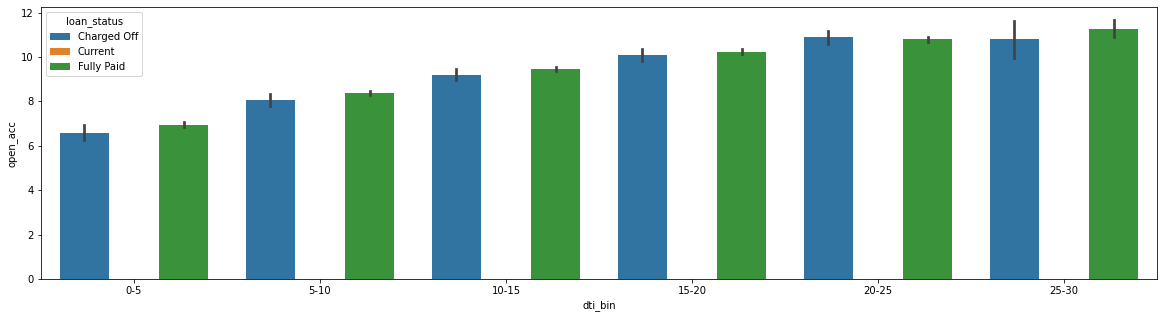

In [166]:
# dti vs open_acc bar plot 
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan_analysis, estimator=np.mean)
plt.show()

- The dti increses with the number of credit line in clients file

---
####  delinq_2yr VS int_rate  VS loan_status

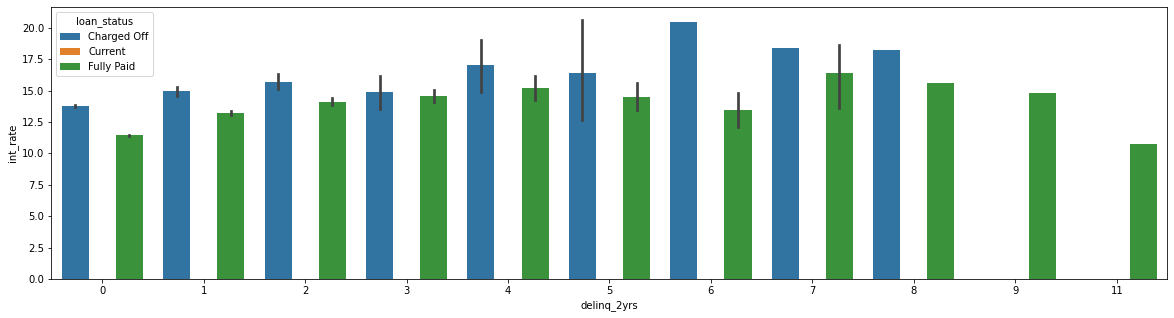

In [167]:
# bar plot
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan_analysis, estimator=np.mean)
plt.show()

In [168]:
# data having more than 1 bankruptcies
loan_1_2_bankruptcies = loan_analysis[loan_analysis['pub_rec_bankruptcies']>0]

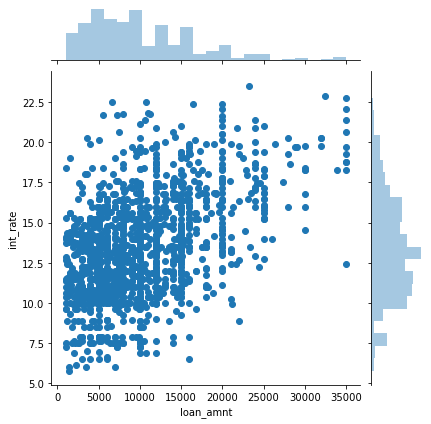

In [169]:
# joint plot having two or more bankruptcies
sns.jointplot('loan_amnt', 'int_rate', loan_1_2_bankruptcies)
plt.show()